# Optical Image tracking demonstration

https://google.github.io/mediapipe/getting_started/python.html

## From static images

In [1]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10]

import mediapipe as mp
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils 
mp_drawing_styles = mp.solutions.drawing_styles

In [2]:
DESIRED_HEIGHT = 600
DESIRED_WIDTH = 600
def resize_and_show(image):
    h, w = image.shape[:2]
    if h < w:
        img = cv2.resize(image, (DESIRED_WIDTH, math.floor(h/(w/DESIRED_WIDTH))))
    else:
        img = cv2.resize(image, (math.floor(w/(h/DESIRED_HEIGHT)), DESIRED_HEIGHT))
    return img
    

In [3]:
# paste this at the start of code
import ssl 

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

In [4]:
image = cv2.imread("/Users/Josh/Downloads/Osaka.png")

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


Nose coordinates: (80.76736330986023, 38.97739903628826)


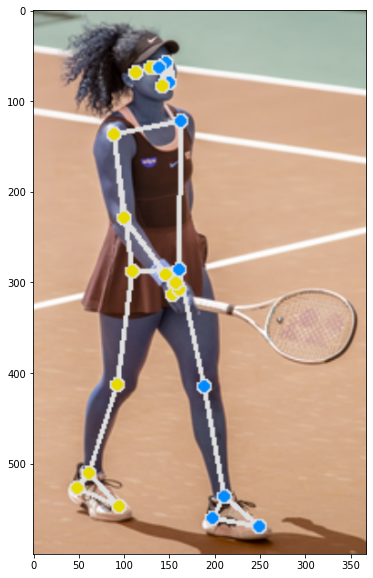

In [5]:
# Run MediaPipe Pose and draw pose landmarks.
with mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5, model_complexity=2) as pose:
#     for name, image in images.items():
    
    # Convert the BGR image to RGB and process it with MediaPipe Pose.
    results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Print nose landmark.
    image_hight, image_width, _ = image.shape
    print(
    f'Nose coordinates: ('
    f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].x * image_width}, '
    f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].y * image_hight})'
    )

    # Draw pose landmarks.
    annotated_image = image.copy()
    mp_drawing.draw_landmarks(
        annotated_image,
        results.pose_landmarks,
        mp_pose.POSE_CONNECTIONS,
        landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style()
    )
    sized_image = resize_and_show(annotated_image)
    plt.imshow(sized_image)
    plt.show()

Nose world landmark:
x: 0.03756577521562576
y: -0.5588608384132385
z: -0.38026124238967896
visibility: 0.9999536275863647



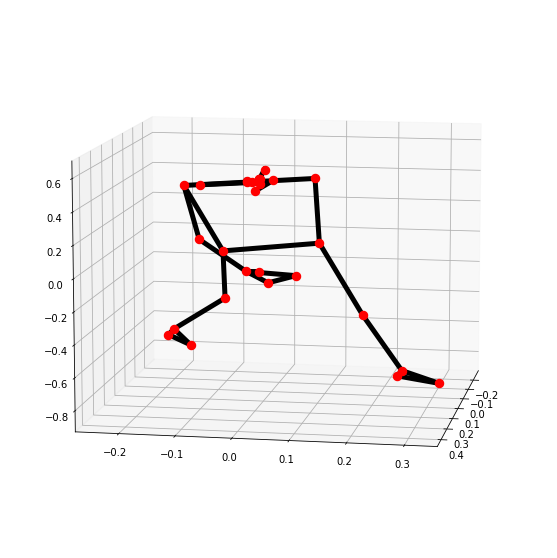

In [6]:
# Run MediaPipe Pose and plot 3d pose world landmarks.
with mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5, model_complexity=2) as pose:
    results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Print the real-world 3D coordinates of nose in meters with the origin at
    # the center between hips.
    print('Nose world landmark:'),
    print(results.pose_world_landmarks.landmark[mp_pose.PoseLandmark.NOSE])

    # Plot pose world landmarks.
    mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)